In [47]:
# Import Essential Libraries
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn


In [48]:
#  Create DATA
bias=0.5
weight=0.7
X=torch.arange(1,9,0.05).unsqueeze(dim=1)
Y=weight*X+bias

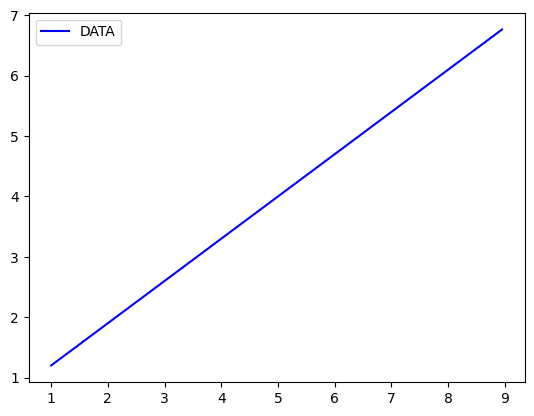

In [49]:
# Plotting DATA
plt.plot(X,Y,c='b',label='DATA')
plt.legend();

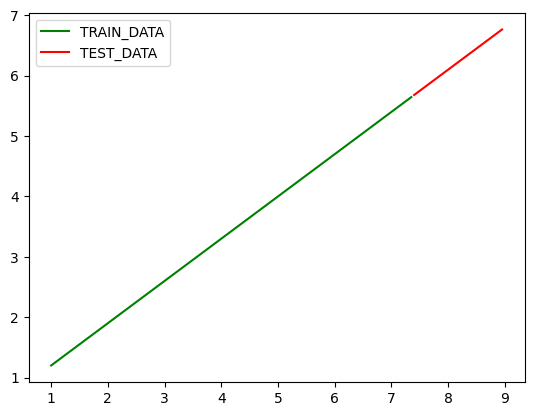

In [50]:
# Split DATA
split=int(0.8*len(X))
X_train,Y_train,X_test,Y_test=X[:split],Y[:split],X[split:],Y[split:]

plt.plot(X_train,Y_train,c='g',label='TRAIN_DATA')
plt.plot(X_test,Y_test,c='r',label='TEST_DATA')
plt.legend();


In [51]:
# Build a Model ussing nn Layer concept  Here We Can not change out put function

class ravi_nn_model(nn.Module):
    def __init__(self):
      super().__init__()
      self.layer_1=nn.Linear(1,1)
    def forward(self,X):
      return self.layer_1(X)

In [52]:
torch.manual_seed(7)
ravi_model_nn_layer=ravi_nn_model()
ravi_model_nn_layer.state_dict()

OrderedDict([('layer_1.weight', tensor([[0.0698]])),
             ('layer_1.bias', tensor([-0.6024]))])

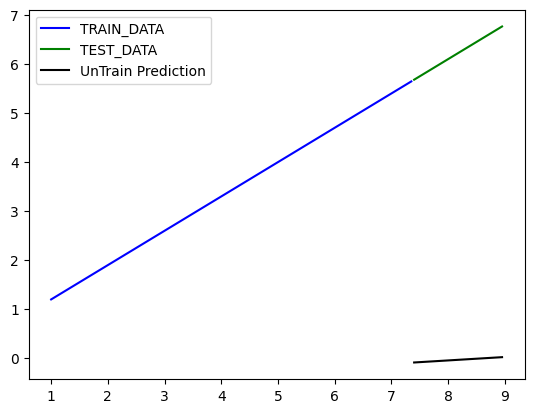

In [53]:
# Prediction through UN Train Model

with torch.inference_mode():
  y_pred_unTrain=ravi_model_nn_layer(X_test)

plt.plot(X_train,Y_train,c='b',label='TRAIN_DATA')
plt.plot(X_test,Y_test,c='g',label='TEST_DATA')
plt.plot(X_test,y_pred_unTrain,c='black',label='UnTrain Prediction')
plt.legend();

In [54]:
#  Create Loss and SGD functions

loss_fn=nn.L1Loss()
SGD=torch.optim.SGD(params=ravi_model_nn_layer.parameters(),lr=0.02)


In [55]:
"""   TRAIN Model ,TEST Model  , PREDICTIONS  """

#  TRAIN MODE
epoch_count=[]
test_loss_count=[]
train_loss_count=[]
print("Enter EPOCHs in Thousands")
epoch=int(input())

for epoch in range(epoch):
  ravi_model_nn_layer.train()
  y_pred_train=ravi_model_nn_layer(X_train)
  train_loss=loss_fn(y_pred_train,Y_train)
  SGD.zero_grad()
  train_loss.backward()
  SGD.step()

#  TEST MODE

  ravi_model_nn_layer.eval()

  with torch.inference_mode():
    y_pred_test=ravi_model_nn_layer(X_test)
    test_loss=loss_fn(y_pred_test,Y_test)

    epoch_count.append(epoch)
    train_loss_count.append(train_loss.detach().numpy())
    test_loss_count.append(test_loss.detach().numpy())

    if epoch%100==0:
      print(f"EPOCH={epoch}  ||  TRAIN LOSS={train_loss}  ||  TEST LOSS={test_loss}")



Enter EPOCHs in Thousands
100
EPOCH=0  ||  TRAIN LOSS=3.733290195465088  ||  TEST LOSS=5.551297664642334


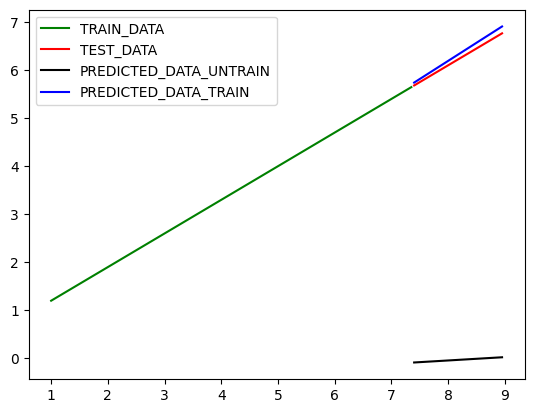

In [56]:
plt.plot(X_train,Y_train,c='g',label='TRAIN_DATA')
plt.plot(X_test,Y_test,c='r',label='TEST_DATA')
plt.plot(X_test,y_pred_unTrain,c='black',label='PREDICTED_DATA_UNTRAIN')
plt.plot(X_test,y_pred_test,c='b',label='PREDICTED_DATA_TRAIN')
plt.legend();

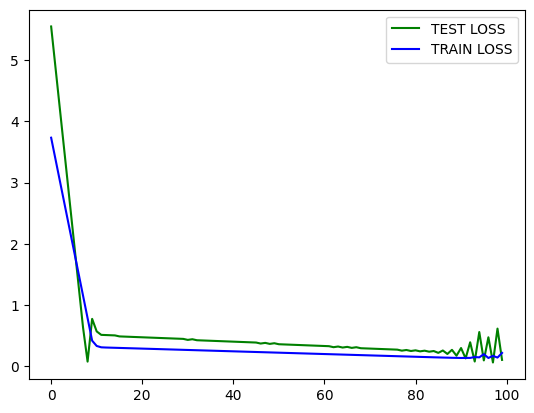

In [57]:
plt.plot(epoch_count,test_loss_count,c='g',label='TEST LOSS')
plt.plot(epoch_count,train_loss_count,c='b',label='TRAIN LOSS')
plt.legend();